# Regresión polinomial

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

In [55]:
#  Datos
exp = np.array([1,2,3,4,5,6,7,8,9,10])
sal = np.array([45000, 50000, 60000, 80000, 110000, 150000, 200000, 300000, 500000, 1000000 ])

#creamos un dataframe
df = pd.DataFrame({'Experiencia': exp, 'Salario': sal})
df

,Experiencia,Salario
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000
5,6,150000
6,7,200000
7,8,300000
8,9,500000
9,10,1000000


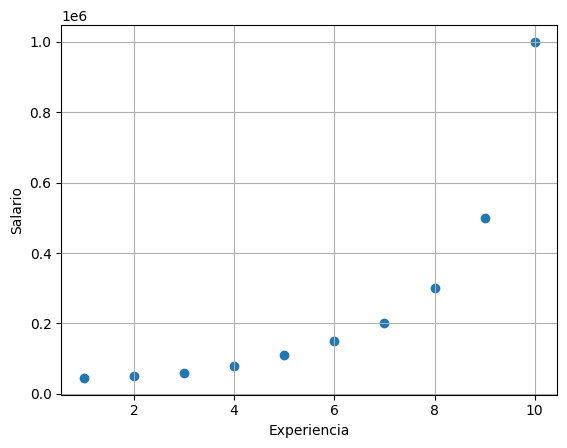

In [56]:
# Graficamos
plt.scatter(df['Experiencia'], df['Salario'])
plt.grid()
plt.xlabel('Experiencia')
plt.ylabel('Salario')
plt.show()

In [57]:
#creamos un modelo de regresión lineal
from sklearn.linear_model import LinearRegression

#creamos el modelo
model = LinearRegression()

#entrenamos el modelo
model.fit(df[['Experiencia']], df['Salario'])


LinearRegression()

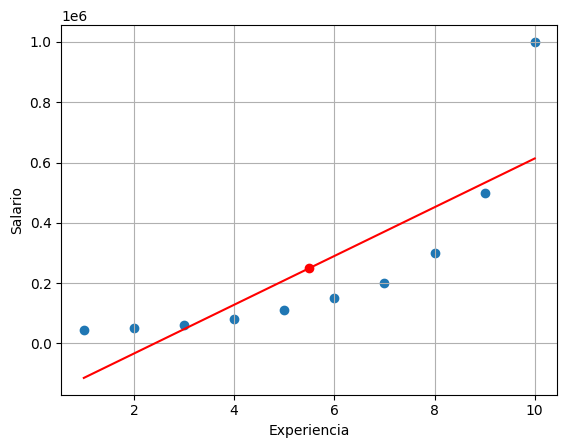

In [58]:
# graficamos el modelo
plt.scatter(df['Experiencia'], df['Salario'])
plt.plot(df['Experiencia'], model.predict(df[['Experiencia']]), 'r')
plt.grid()
plt.xlabel('Experiencia')
plt.ylabel('Salario')

#predicción para 5.5 años de experiencia
años = 5.5
prediccion = model.predict([[años]])
plt.scatter(años, prediccion, c='r')
plt.show()

In [59]:
#Definimos las variables objetivo e independiente
x= df['Experiencia']
y= df['Salario']

In [60]:
#Dividimos el dataset en conjunto de entrenamiento y conjunto de testing 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [61]:
# Importamos la clase PolynomialFeatures para entrenar nuestro modelo de regresion polinomial
from sklearn.preprocessing import PolynomialFeatures

In [62]:
# Ajustamos los datos de entrenamiento a un polinomio grado 4
poly = PolynomialFeatures(degree = 4)

#Transformamos los datos de entrenamiento
x_poly = poly.fit_transform(x_train.values.reshape(-1,1))

In [63]:
#Creamos modelo de regresión lineal con los datos transformados
poly_reg = LinearRegression()
poly_reg .fit(x_poly, y_train)

LinearRegression()

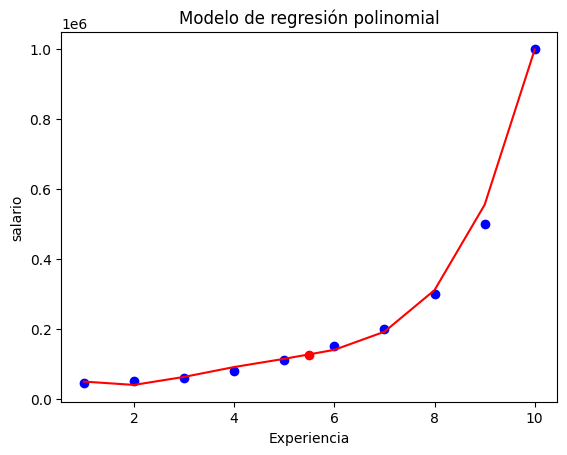

predicción para 5.5 años de experiencia [125793.73814256]


In [64]:
#Visualizamos los resultados de la Regresión Polinomial
plt.scatter(x, y , color= 'b')
plt.plot(x, poly_reg.predict(poly.fit_transform(x.values.reshape(-1,1))),color='r')
plt.title ('Modelo de regresión polinomial')
plt.xlabel('Experiencia')
plt.ylabel('salario')

#predicción para un nuevo dato de 5.5 años de experiencia
años = 5.5 
prediccion = poly_reg.predict(poly.fit_transform([[años]]))
plt.scatter(años, prediccion, c='r')
plt.show()
print('predicción para 5.5 años de experiencia',prediccion)

# Regresión de véctores de soporte (Support-Vector-Regresion, SVR)

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

In [67]:
#Generamos datos aleatorios
np.random.seed(0)
x = np.sort(5 * np.random.rand(50, 1), axis=0)
y = (x*1.3).ravel() + np.random.rand(50)
y[::5] += 3 * (0.5 - np.random.rand(10))

#Entrenamos el modelo SVM con kernel lineal
svr_linear = SVR(kernel= 'linear')
y_linear = svr_linear.fit(x, y).predict(x)

#calculamos los limites del margen
support_vectors = svr_linear.support_vectors_
margin = 1 / np.sqrt(np.sum(svr_linear.coef_ ** 2))
lower_margin = y_linear - np.sqrt(1 + margin ** 2)
upper_margin = y_linear + np.sqrt(1 + margin ** 2)


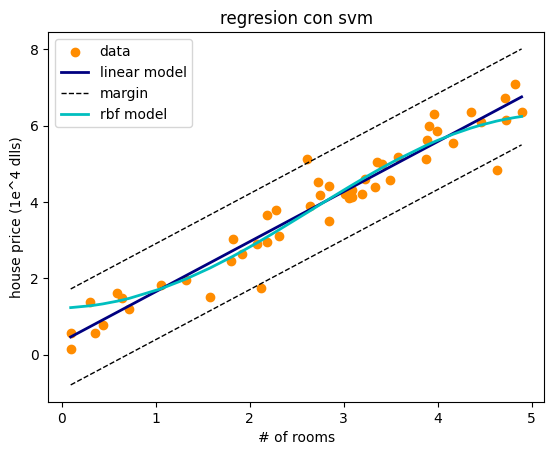

In [69]:
#los hacemos con kernel gaussiano
svr_rbf = SVR(kernel= 'rbf', gamma=0.1)
y_rbf = svr_rbf.fit(x, y).predict(x)

#graficamos los datos y la regresion de SVM
plt.scatter(x, y, color='darkorange', label='data')
plt.plot(x, y_linear, color='navy', lw=2, label ='linear model')
plt.plot(x, lower_margin, 'k--', lw=1, label= 'margin')
plt.plot(x, upper_margin, 'k--', lw=1)

#graficamos la regersión  con el kernel gaussiano
plt.plot(x, y_rbf, color='c', lw=2, label='rbf model')
plt.xlabel('# of rooms')
plt.ylabel('house price (1e^4 dlls)')
plt.title('regresion con svm')
plt.legend()
plt.show()

In [70]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
#creamos un dataset de prueba
rng = np.random.RandomState(1)
x = np.sort(5 * rng.rand(80, 1 ), axis=0)
y = np.sin (x).ravel()
y[::5] +=3 * (0.5 - rng.rand(16))

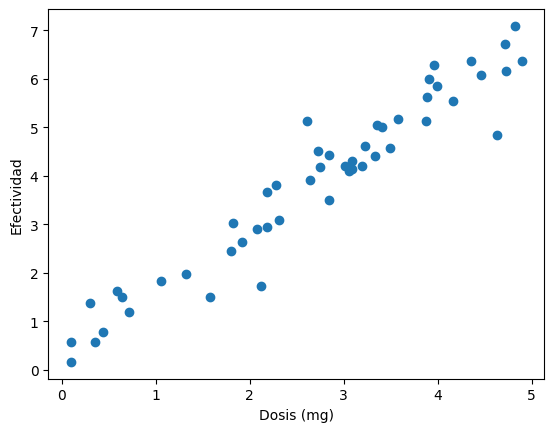

In [71]:
#graficamos los datos
plt.figure()
plt.xlabel('Dosis (mg)')
plt.ylabel('Efectividad')
plt.scatter(x, y)
plt.show()

In [72]:
#dividimos el dataset en conjunto de entrenamiento y conjunta de testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [73]:
#instanciamos y entrenamos el modelo
clf= DecisionTreeRegressor(max_depth=2)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

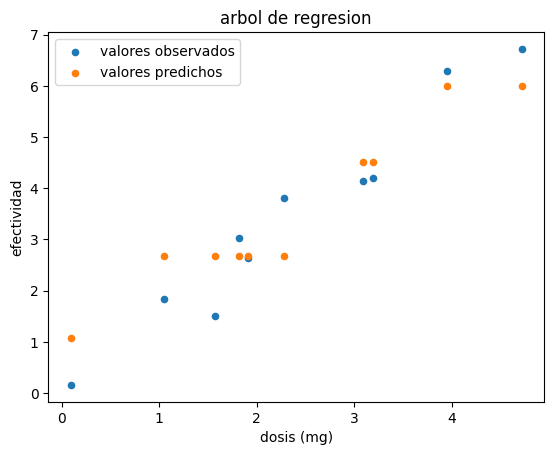

In [74]:
#graficamos los resultados
plt.scatter(x_test, y_test, s=20, label='valores observados')
plt.scatter(x_test, y_pred, s=20, label='valores predichos')
plt.xlabel('dosis (mg)')
plt.ylabel('efectividad')
plt.title('arbol de regresion')
plt.legend()
plt.show()